# Redes neurais convolucionais para detecção de gatos e cachorros

nesse código, vamos criar uma inteligencia artificial para conferir se dentro de uma imagem tem um gato ou um cachorro, e após isso vamos classificar uma única foto que se você tiver, pode ser do seu próprio pet

## Importação das bibliotecas e montagem do drive

aqui abaixo vamos importar pacotes de códigos, que vão criar e treinar a nossa IA e como atividades extras, há pacotes de gráficos para avaliar o andamento do classificador

In [ ]:
#importando bibliotecas
#gráficos
import matplotlib.pyplot as plt
import seaborn as sns
#analise e tratamento de imagens e dados
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#manipulação da base de dados para atender aos requisitos do tensorflow
import zipfile
import os
#rede neural convolucional
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

abaixo estamos colocando os arquivos do nosso drive dentro do notebook do colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Extração de imagens

como o arquivo é um .zip, precisamos extrair o que tem nele e colocar colab

In [ ]:
caminho = '/content/drive/MyDrive/estudo de visao computacional/Datasets/cat_dog_2.zip' #substitua aqui pelo camonho do arquivo do datasetque voces viram no qrcode
zipado = zipfile.ZipFile(file = caminho, mode = 'r')
zipado.extractall('./')
zipado.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/drive/MyDrive/estudo de visao computacional/Datasets/cat_dog_2.zip' mode='r'>>

visualizar algumas imagens do dataset

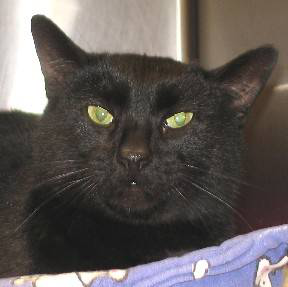

In [ ]:
tf.keras.preprocessing.image.load_img('/content/cat_dog_2/training_set/cat/cat.1016.jpg')

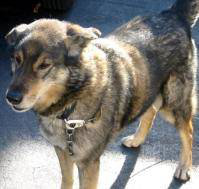

In [ ]:
tf.keras.preprocessing.image.load_img('/content/cat_dog_2/training_set/dog/dog.1022.jpg')

## Gerando base de treino

aqui nós vamos preparar as imagens para enviar para a IA, ela vai analisar as imagens para aprender o que é um gato e o que é um cachorro

In [ ]:
gerador_treinamento = ImageDataGenerator(rescale = 1./255,
                                         rotation_range=7,
                                         horizontal_flip=True,
                                         zoom_range=0.4,
                                         shear_range = 0.2
                                         )

parametros usados:^^<br>
rescale = pegar os pixels que vão de 1 a 255 e normaliza os valores<br>
rotation_range -> o quanto a IA vai poder girar a imagem para conseguir novas imagens<br>
horizontal_flip = pergunta se a IA pode girar a imagem <br>
zoom_range = o quanto a IA pode dar zoom na imagem, aumentando e ignorando as bordas da imagem<br>
shear_range = o quando a IA pode cortar e deformar a imagem para pegar as partes mais importantes

In [ ]:
base_treino = gerador_treinamento.flow_from_directory('/content/cat_dog_2/training_set',
                                                      target_size=(64,64),
                                                      batch_size=20,
                                                      class_mode='categorical',
                                                      shuffle=True)

Found 4000 images belonging to 2 classes.


parametros usados:^^<br>
target_size = tamanho padrão para todas as imagens<br>
batch_size = quantas imagens vão ser enviadas por vez no treinamento<br>
class_mode = o tipo de resposta que esperamos da IA<br>
shuffle = aleatoriezar a ordem das imagens para que a IA não detecte padrões na ordem<br><br>
abaixo vemos as respostas da base de treino

In [ ]:
base_treino.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
base_treino.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

## Gerando base de testes

In [ ]:
gerador_testes = ImageDataGenerator(rescale=1./255)
base_teste = gerador_testes.flow_from_directory('/content/cat_dog_2/test_set',
                                                target_size=(64,64),
                                                batch_size=1,
                                                class_mode='categorical',
                                                shuffle=False)

Found 1000 images belonging to 2 classes.


In [ ]:
base_teste.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
base_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Criação da rede neural

aqui nós vamos criar a arquitetura da nossa IA, o modelo usado é o de rede neural, que tem várias camadas de neuronios que vão multiplicando os valores para chegar no resultado <br>
aqui estamos usando uma rede neural convolucional, que tem algumas camadas que alteram as imagens antes de passar pelas camadas densas, que multiplicam os valores gerando a resposta

In [ ]:
#chamando a rede
rede = Sequential()
#camadas convolução
rede.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu',input_shape=(64,64,3)))
rede.add(MaxPool2D(pool_size=(2,2)))
rede.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
rede.add(MaxPool2D(pool_size=(2,2)))
rede.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
rede.add(MaxPool2D(pool_size=(2,2)))
#camada de flatten
rede.add(Flatten())
#camadas densa
rede.add(Dense(units=577, activation='relu'))
rede.add(Dense(units=577, activation='relu'))
rede.add(Dense(units=2, activation='softmax'))

abaixo vemos como ficou a arquitetura da rede neural

In [ ]:
rede.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)        

compilando a rede para poder fazer o treinamento, aqui colocamos os parametros do treinamento.

In [ ]:
#compilando
rede.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

## Treinamento e avaliação

aqui temos o treinamento, que é demorado devido a quantidade de imagens do dataset, a epochs é quantas rodadas ele vai receber as imagens para aprender as diferenças, o loss é a "sujeita" da IA que atrapalha o resultado e o accuracy é a acurácia, que calcula a precisão da IA

In [ ]:
historico = rede.fit(base_treino, epochs=20)

Epoch 1/20
200/200 [==============================] - 28s 133ms/step - loss: 0.6928 - accuracy: 0.5142
Epoch 2/20
200/200 [==============================] - 29s 143ms/step - loss: 0.6873 - accuracy: 0.5372
Epoch 3/20
200/200 [==============================] - 27s 132ms/step - loss: 0.6812 - accuracy: 0.5580
Epoch 4/20
200/200 [==============================] - 26s 132ms/step - loss: 0.6802 - accuracy: 0.5598
Epoch 5/20
200/200 [==============================] - 26s 132ms/step - loss: 0.6754 - accuracy: 0.5763
Epoch 6/20
200/200 [==============================] - 26s 131ms/step - loss: 0.6621 - accuracy: 0.5957
Epoch 7/20
200/200 [==============================] - 26s 132ms/step - loss: 0.6520 - accuracy: 0.6150
Epoch 8/20
200/200 [==============================] - 27s 132ms/step - loss: 0.6382 - accuracy: 0.6388
Epoch 9/20
200/200 [==============================] - 27s 132ms/step - loss: 0.6216 - accuracy: 0.6630
Epoch 10/20
200/200 [==============================] - 27s 134ms/step - l

Avaliando a rede<br>
vamos pegar as imagens destinadas a treino e pedir para IA dizer a resposta de cada imagem, após isso vamos comparar as respostas com a resposta verdadeira para calcular a precisão e o erro

In [ ]:
previsoes = rede.predict(base_teste)
previsoes

1000/1000 [==============================] - 7s 7ms/step


array([[9.9116689e-01, 8.8330908e-03],
       [3.7486288e-01, 6.2513709e-01],
       [2.6223198e-02, 9.7377682e-01],
       ...,
       [9.7524666e-05, 9.9990249e-01],
       [2.3415107e-02, 9.7658485e-01],
       [6.4205045e-07, 9.9999940e-01]], dtype=float32)

In [ ]:
#conseguindo as respostas
previsoes = np.argmax(previsoes, axis=1)
previsoes

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,

In [ ]:
base_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#porcentagem de acurácia
from sklearn.metrics import accuracy_score
accuracy_score(base_teste.classes, previsoes)

0.755

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(base_teste.classes, previsoes))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       500
           1       0.73      0.82      0.77       500

    accuracy                           0.76      1000
   macro avg       0.76      0.75      0.75      1000
weighted avg       0.76      0.76      0.75      1000



classificando uma única imagem, aqui voce pode colocar uma imagem do seu pet no drive para ser classificada aqui

In [ ]:
caminho = ''#insira aq o caminho da imagem

In [ ]:
imagem = cv2.imread(caminho)
cv2_imshow(imagem)

processamento da imagem para caber na IA

In [ ]:
imagem = cv2.resize(imagem, (64,64))
imagem = imagem /255
imagem.reshape(-1,64,64,3)

gerando e trabalhando na resposta

In [ ]:
resposta = rede(imagem)
resposta = np.argmax(resposta)
resposta

como prosseguir a partir daqui?

In [ ]:
if resposta  == 1:
  #o que seu código vai fazer se for um cachorro?
  print('é um cachorro')
else:
  #o que seu código vai fazer se for um gato?
  print('é um gato')